In [1]:
install.packages("GGally")

Installing package into '/home/jupyter-user/.rpackages'
(as 'lib' is unspecified)
also installing the dependency 'reshape'



In [2]:
system("gsutil cp gs://fc-adaae650-a458-4c56-8a55-d96fa463a5c6/sample_annotation/freeze5b_sample_annot_2017-12-01.txt .")

In [14]:
dim(pcs)
table(pcs$sample.id %in% map$sample.id)
pcs <- subset(pcs, select=c("sample.id",(paste("PC",1:10,sep=""))))

[1] 54371    33


 TRUE 
54371 

In [18]:
map <- subset(map, study %in% c('Amish','ARIC','CCAF','CFS','CHS','COPDGene','DHS','FHS','GeneSTAR','GENOA','GenSalt','GOLDN','HVH','HyperGEN', 'JHS','MESA','MGH_AF','Partners','SAFS','SAS','VAFAR','VU_AF','WHI'))
pcs <- subset(pcs, sample.id %in% map$sample.id)


In [19]:


in.ped.pcs <- as.matrix(pcs[,paste("PC",1:6,sep="")])
row.names(in.ped.pcs) <- pcs$sample.id

In [17]:
summary(in.ped.pcs)

      PC1                  PC2                  PC3            
 Min.   :-3.411e-03   Min.   :-0.0021020   Min.   :-0.0378365  
 1st Qu.:-3.248e-03   1st Qu.:-0.0017614   1st Qu.: 0.0004707  
 Median :-3.074e-03   Median :-0.0015771   Median : 0.0008056  
 Mean   : 2.695e-05   Mean   : 0.0000167   Mean   : 0.0002234  
 3rd Qu.: 5.378e-03   3rd Qu.:-0.0011937   3rd Qu.: 0.0010142  
 Max.   : 9.640e-03   Max.   : 0.0164508   Max.   : 0.0178362  
      PC4                  PC5                  PC6            
 Min.   :-1.353e-02   Min.   :-8.705e-03   Min.   :-0.0827232  
 1st Qu.:-5.685e-04   1st Qu.:-2.095e-03   1st Qu.:-0.0002891  
 Median :-3.826e-04   Median :-7.509e-04   Median : 0.0002276  
 Mean   : 1.522e-05   Mean   :-5.453e-06   Mean   :-0.0010243  
 3rd Qu.:-1.809e-04   3rd Qu.:-9.586e-05   3rd Qu.: 0.0007864  
 Max.   : 2.533e-02   Max.   : 2.696e-02   Max.   : 0.0056933  

In [21]:
dist.pcs <- dist(in.ped.pcs)


In [22]:
install.packages("fastcluster")

Installing package into '/home/jupyter-user/.rpackages'
(as 'lib' is unspecified)


In [23]:
library(fastcluster)

hr <- hclust(dist.pcs, method="ward.D2")


Attaching package: 'fastcluster'

The following object is masked from 'package:stats':

    hclust



In [24]:
 dend <- as.dendrogram(hr)


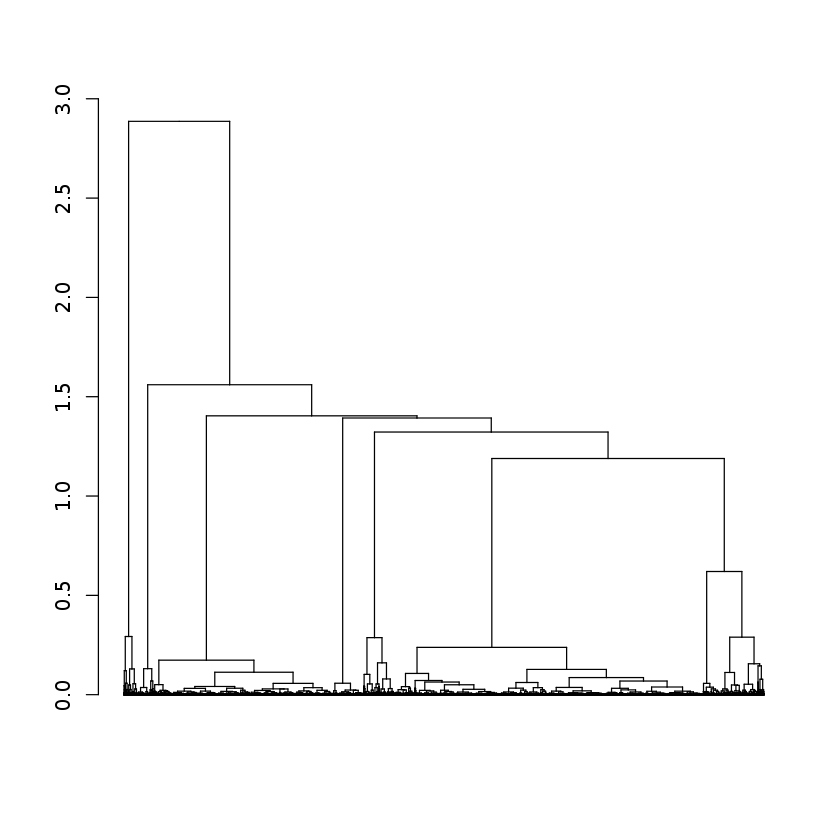

In [25]:
plot(dend,leaflab = "none")


In [26]:
sum.pcs <- 2893.24885 + 1011.79633  + 159.10140  + 111.33650  + 51.31931  + 16.57484
in.ped.rescale <- pcs[,paste("PC",1:6,sep="")]
in.ped.rescale$PC1 = 2893.24885*in.ped.rescale$PC1 #/sum.pcs
in.ped.rescale$PC2 = 1011.79633*in.ped.rescale$PC2 #/sum.pcs
in.ped.rescale$PC3 = 159.10140*in.ped.rescale$PC3 #/sum.pcs
in.ped.rescale$PC4 = 111.33650*in.ped.rescale$PC4 #/sum.pcs
in.ped.rescale$PC5 = 51.31931*in.ped.rescale$PC5 #/sum.pcs
in.ped.rescale$PC6 = 16.57484*in.ped.rescale$PC6 #/sum.pcs
in.ped.rescale <- as.matrix(in.ped.rescale)
summary(in.ped.rescale)
rownames(in.ped.rescale) <- pcs$sample.id

head(in.ped.rescale)

      PC1                PC2                PC3                PC4           
 Min.   :-9.86871   Min.   :-2.12683   Min.   :-6.01985   Min.   :-1.506456  
 1st Qu.:-9.39708   1st Qu.:-1.78213   1st Qu.: 0.07488   1st Qu.:-0.063297  
 Median :-8.89249   Median :-1.59572   Median : 0.12817   Median :-0.042592  
 Mean   : 0.07798   Mean   : 0.01689   Mean   : 0.03554   Mean   : 0.001695  
 3rd Qu.:15.55931   3rd Qu.:-1.20779   3rd Qu.: 0.16135   3rd Qu.:-0.020144  
 Max.   :27.89030   Max.   :16.64489   Max.   : 2.83777   Max.   : 2.820026  
      PC5                  PC6           
 Min.   :-0.4467499   Min.   :-1.371125  
 1st Qu.:-0.1075261   1st Qu.:-0.004792  
 Median :-0.0385346   Median : 0.003772  
 Mean   :-0.0002798   Mean   :-0.016978  
 3rd Qu.:-0.0049194   3rd Qu.: 0.013034  
 Max.   : 1.3837847   Max.   : 0.094365  

,PC1,PC2,PC3,PC4,PC5,PC6
NWD100014,22.582235,-1.228770,0.06034383,-0.03331563,-0.02624149,0.009397857
NWD100018,-9.574687,-1.870281,0.18775524,-0.04550654,-0.10517237,-0.003906725
NWD100027,-9.348175,-1.847414,0.17796554,-0.09466609,0.01952834,0.011430367
NWD100048,-9.436386,-1.755388,0.24121662,-0.03307045,-0.05577099,-0.003514210
NWD100057,-9.153981,-1.808653,0.16792115,-0.06678166,0.04497953,-0.128174177
NWD100059,-9.208053,-1.762994,0.11348048,-0.01387587,0.06972055,-0.006116220


In [27]:
dist.pcs.rescale <- dist(in.ped.rescale)

hr.rescale <- hclust(dist.pcs.rescale, method="ward.D2") 
dend.rescale <- as.dendrogram(hr.rescale)



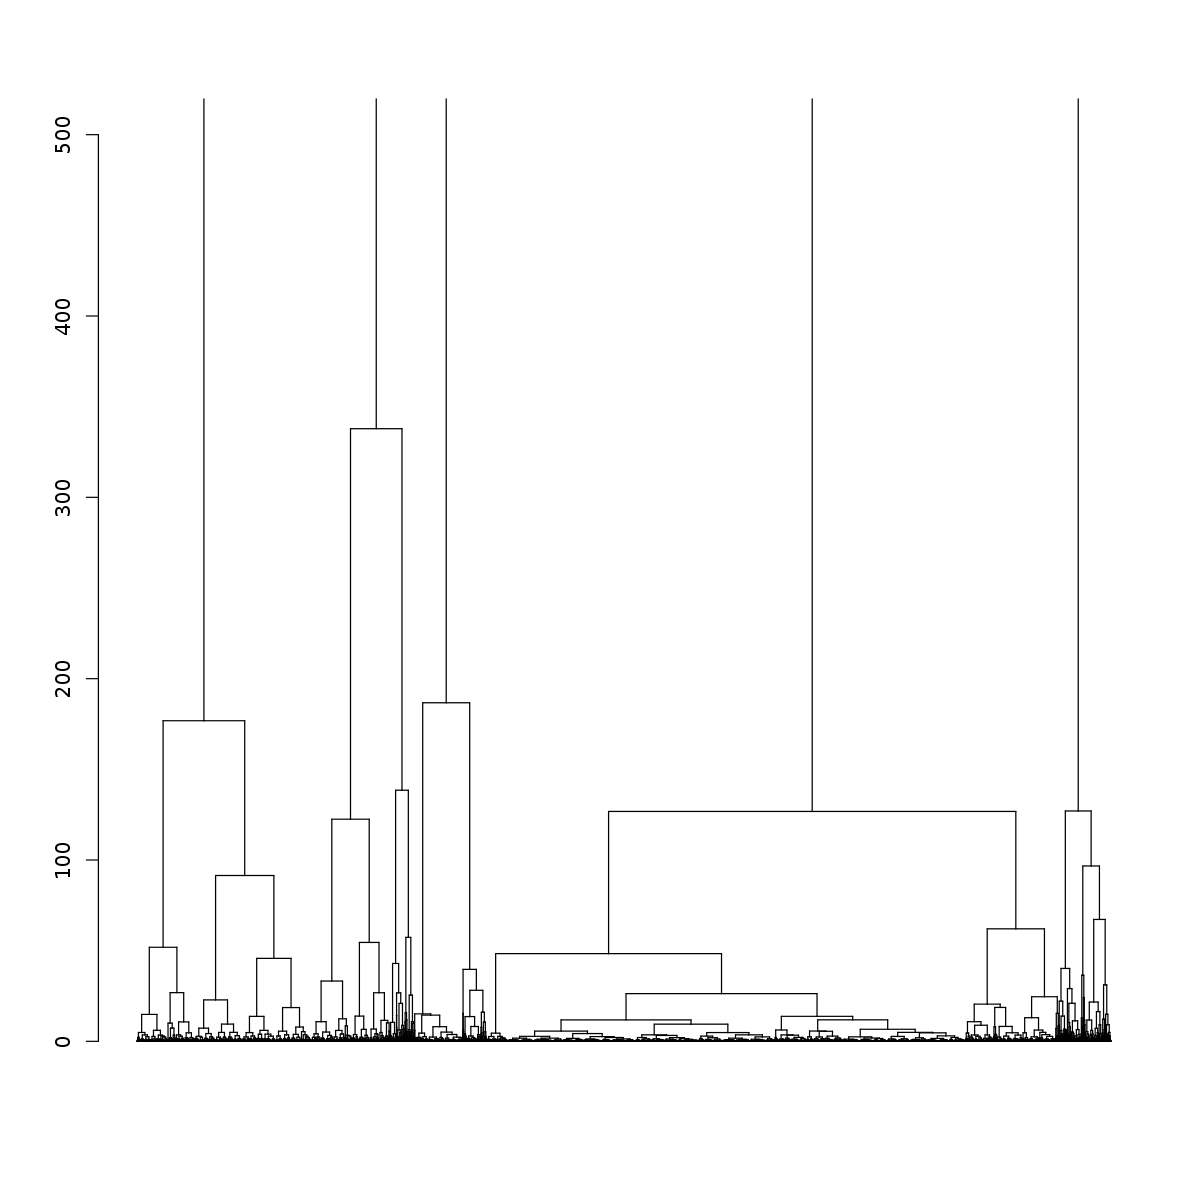

In [28]:
options(repr.plot.width=10, repr.plot.height=10)
plot(dend.rescale,leaflab = "none",ylim=c(0,500))

In [29]:
install.packages("dendextend")

Installing package into '/home/jupyter-user/.rpackages'
(as 'lib' is unspecified)
also installing the dependencies 'modeltools', 'DEoptimR', 'mclust', 'flexmix', 'prabclus', 'diptest', 'mvtnorm', 'robustbase', 'kernlab', 'trimcluster', 'gridExtra', 'fpc', 'viridis'



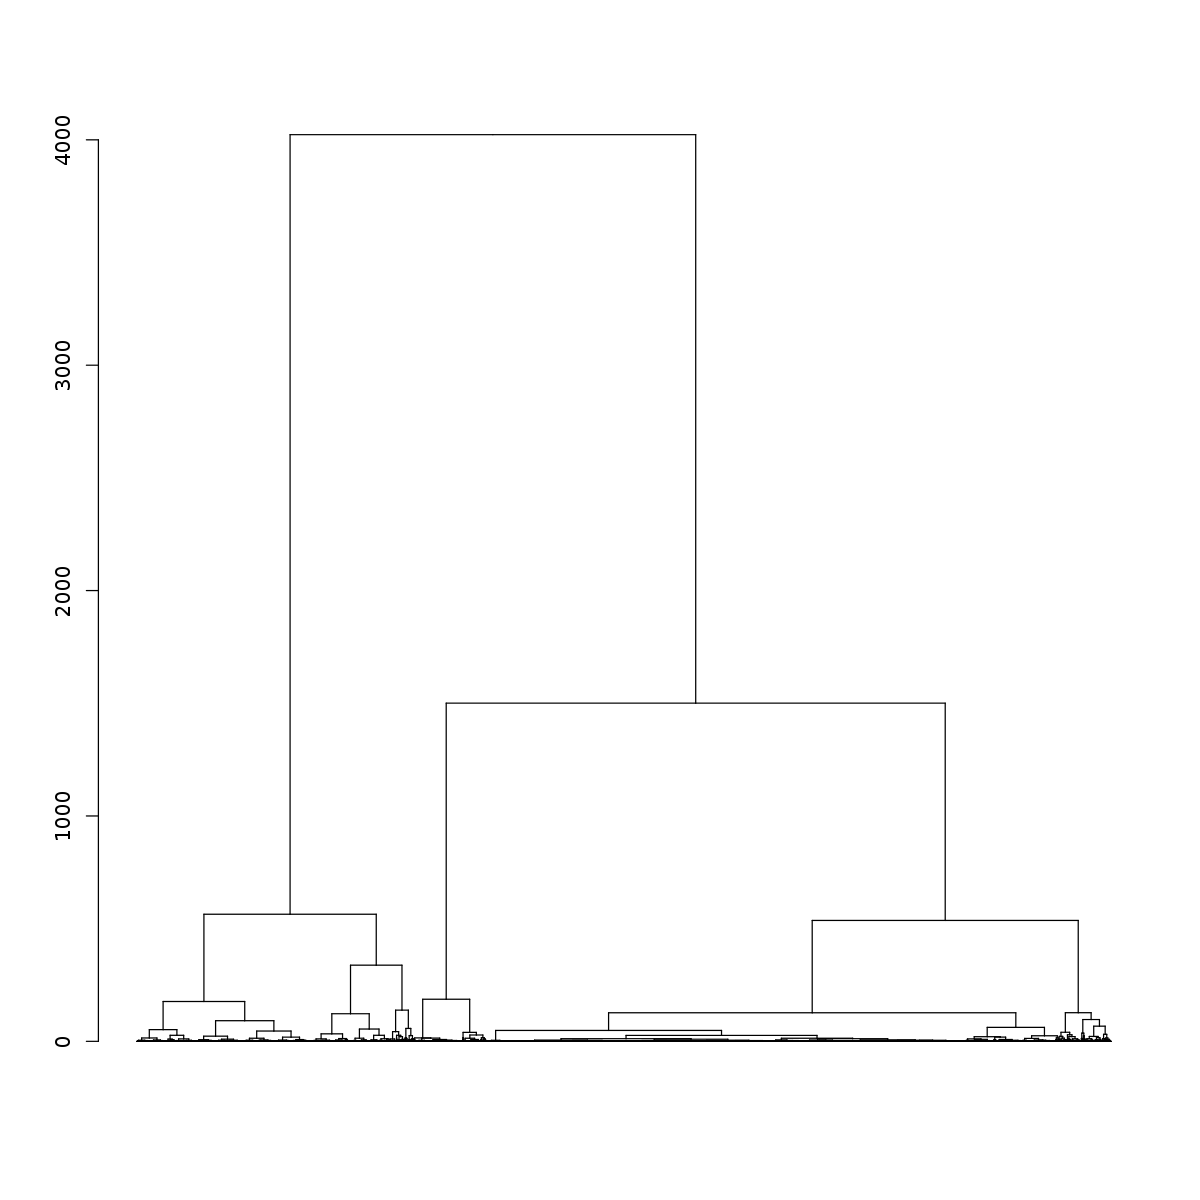

In [30]:
plot(dend.rescale,leaflab = "none")

In [31]:
library(dendextend)



---------------------
Welcome to dendextend version 1.8.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------


Attaching package: 'dendextend'

The following object is masked from 'package:data.table':

    set

The following object is masked from 'package:stats':

    cutree



In [32]:
do.cluster <- function(i,hr) {  

  dend <-as.dendrogram(hr)

  clust.list.to.return <- dendextend:::cutree(dend, k=i) #, order_clusters_as_data = FALSE)

  clust.cutree2 <- dendextend:::cutree(dend, k=i, order_clusters_as_data = FALSE)

  idx <- order(names(clust.cutree2))
  clust.cutree2 <- clust.cutree2[idx]
  tbl <- table(clust.list.to.return, clust.cutree2)
  print(tbl)
  lbls <- apply(tbl,2,which.max)
  dend1 <- color_branches(dend, k = i, groupLabels = lbls)
  print(table(clust.list.to.return))

  print(plot(dend1,leaflab = "none"))
  return(clust.list.to.return)
} 

[1] 10
                    clust.cutree2
clust.list.to.return     1     2     3     4     5     6     7     8     9
                  1      0     0     0 13709     0     0     0     0     0
                  2      0     0     0     0     0     0 23693     0     0
                  3      0     0     0     0     0     0     0     0     0
                  4      0     0     0     0  2390     0     0     0     0
                  5      0     0     0     0     0  2296     0     0     0
                  6      0     0  1210     0     0     0     0     0     0
                  7      0     0     0     0     0     0     0     0  1598
                  8      0     0     0     0     0     0     0  1315     0
                  9    347     0     0     0     0     0     0     0     0
                  10     0   680     0     0     0     0     0     0     0
                    clust.cutree2
clust.list.to.return    10
                  1      0
                  2      0
                  3

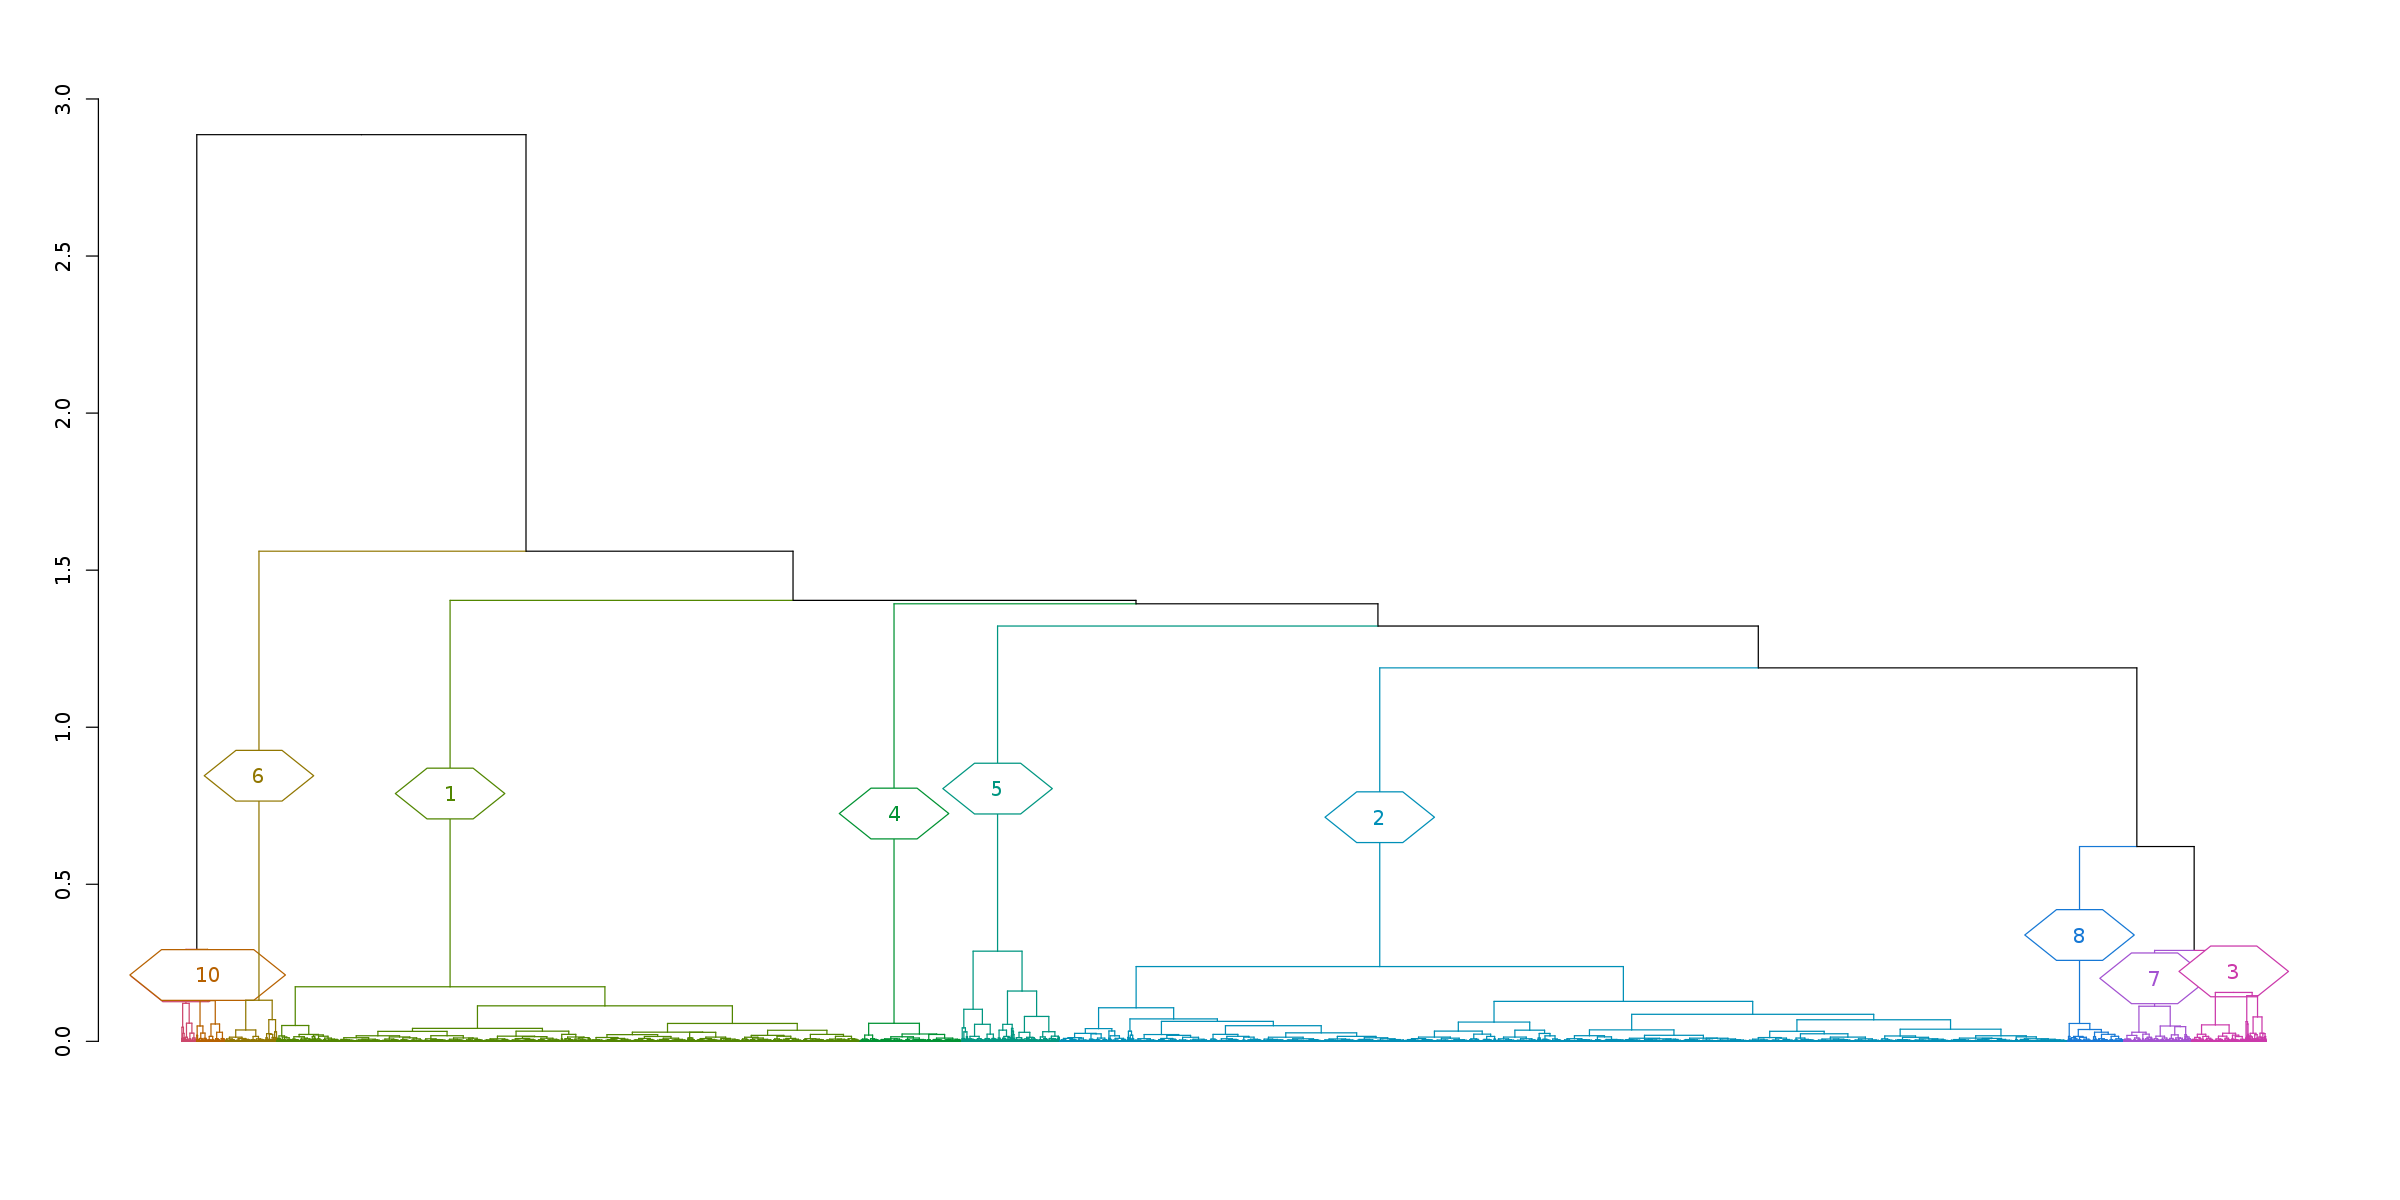

In [33]:
options(repr.plot.width=20, repr.plot.height=10)
 
i <- 10
 #dend <- as.dendrogram(hr)
 print(i)


dend <-as.dendrogram(hr)

clust.recale <- do.cluster(i=i,hr=hr)
print(table(clust.recale))


In [35]:
table(map$cluster,map$topmed_project,useNA = "always",has.PCs=map$sample.id %in% pcs$sample.id[which(!is.na(pcs$PC1))])

#table(map$cluster,map$sample.id %in% pcs$sample.id[which(!is.na(pcs$PC1))], map$keep == TRUE,useNA = "always")

, , has.PCs = FALSE

      
       AA_CAC AFGen Amish  CFS COPD  FHS GOLDN GenSalt GeneSTAR HyperGEN_GENOA
  1         0     0     0    0    0    0     0       0        0              0
  2         0     0     0    0    0    0     0       0        0              0
  3         0     0     0    0    0    0     0       0        0              0
  4         0     0     0    0    0    0     0       0        0              0
  5         0     0     0    0    0    0     0       0        0              0
  6         0     0     0    0    0    0     0       0        0              0
  7         0     0     0    0    0    0     0       0        0              0
  8         0     0     0    0    0    0     0       0        0              0
  9         0     0     0    0    0    0     0       0        0              0
  10        0     0     0    0    0    0     0       0        0              0
  <NA>      0     9     2    3    0   19     0       0        0              0
      
        JHS MESA 

In [36]:
write.table(map,"freeze5b_sample_annot_2017-12-01.T2D_cohorts.clusters.csv",row.names=F,quote=FALSE,sep=",")

In [37]:
system("gsutil cp freeze5b_sample_annot_2017-12-01.T2D_cohorts.clusters.csv gs://fc-adaae650-a458-4c56-8a55-d96fa463a5c6/sample_annotation/freeze5b_sample_annot_2017-12-01.T2D_cohorts.clusters.csv")